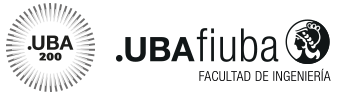

# <center> ANÁLISIS NUMÉRICO I - MODELACIÓN NUMÉRICA
# <center> Ecuaciones no Lineales - Segunda Parte
# <center> Métodos de refinamiento: Newton-Raphson -- Secante

***

**Curso Schwarz - Sosa - Castaño**
- 75.12/95.04 <b>Análisis Numérico I</b>. *Curso 4*.
- CB051 <b>Modelación Numérica</b>. *Curso 4*.

## <center> CASO A ANALIZAR
___
Hallar $p$ tal que $f(p)=0,$ $p  \in [10,150]$ siendo :
$$f(x)=\frac{9,80665\cdot 12^2}{2\cdot \pi}\cdot \tanh\left(\frac{2\cdot \pi\cdot 14}{x}\right)-x$$

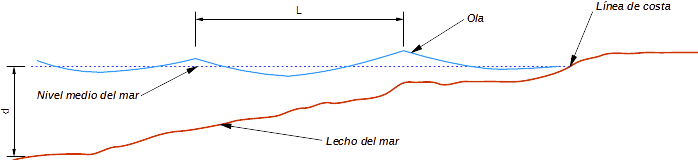


### Búsqueda de raíces en ecuaciones no lineales
___

Problema a resolver: hallar $p$ tal que $f(p)=0,$ $p  \in [a,b].$



### <center> Método Newton-Raphson
___
Otra forma de obtener una mejora del <b>Método del Punto Fijo</b> es a partir del <b>Método de la «Regula-Falsi»</b>. En vez de trazar una cuerda entre los dos extremos del intervalo, trazamos una **tangente**, que pase por un punto. Supongamos que para el intervalo $[a, b]$ trazamos la tangente $f(x)$ que pasa por $f(b)$:
La ecuación de la recta tangente será:

$$t(x) =f(b) + f'(b)(x - b). $$

Cuando se cumpla que $f(x) = 0$ se deberá cumplir que $t(x) = 0$. Por lo tanto podríamos hallar un valor $x_1$ tal que $t(x_1) = 0$ para ir aproximando nuestra raíz. Así obtenemos:

$$ t(x_1) = 0 = f'(b)(x_1 - b) + f(b) $$

$$ x_1 = b - \frac{f(b)}{f'(b)} $$

Si $f(x_1) \ne 0$, podemos repetir el procedimiento otra vez para obtener un $x_2$. En definitiva, podemos crear una aproximación iterativa de la siguiente forma:

$$ x_{j+1}=x_j-\frac{f(x_j)}{f'(x_j)}.$$

Ahora aplicamos el <b>Método de Newton-Raphson</b> con $x_0=20$ m.

In [1]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos

#programo el método Newton Raphson
def Newton_Raphson(x0 , tol, itmax = 100): 
        df = pd.DataFrame(columns=('xcero','xuno'))
        x0 = x0 
        contador = 0  
        x1 = x0-f(x0)/fd(x0)
        while (contador < itmax) and (abs((x1-x0)/x1) > tol):
            df.loc[contador] = [x0,x1]
            x0 = x1                                                 
            x1 = x0-f(x0)/fd(x0)                 
            contador += 1
        er=abs((x1 - x0) / x1)
        print('El \033[1mMétodo de Newton-Raphson\033[0m convergió en',contador,'iteraciones, el resultado es:',np.round(x1,6),'m y el error relativo es',np.format_float_scientific(er,precision=6),'. El valor de la función resulta',np.format_float_scientific(f(x1),precision=6),'m.')
        return df


In [2]:
#Definición del valor inicial y la Tolerancia
import sympy as sp #Librería para manejo simbólico de ecuaciones

X0=10
tolerancia=10**(-8)

#Primero trabajamos con la función simbólicamente para que calcule la derivada
x = sp.symbols('x')
y = (9.80665*12**2)/(2*sp.pi)*sp.tanh((2*sp.pi*14/x))-x#Acá hay que escribor la función a analizar. OJO que sympy es un poco distinto a numpy
yd = sp.diff(y,x) #Calcula la derivada simbólica

#Con el comando "sp.lambdify" pasamos a que evalúe numéricamente
f=sp.lambdify(x,y)
fd=sp.lambdify(x,yd)

ejemplo=Newton_Raphson(X0, tolerancia)


El Método de Newton-Raphson convergió en 5 iteraciones, el resultado es: 131.395838 m y el error relativo es 4.544589e-13 . El valor de la función resulta 2.842171e-14 m.


In [5]:
from IPython.display import display, Math
import sympy.printing as printing

xcero = ejemplo.xcero
xuno = ejemplo.xuno

print ("Analicemos todas las iteraciones. \n")  

for p in range (4):
    print ("\033[1mIteración \033[0m"+str(p+1)+": ")
    ec = "x_"+str(p)+"= "+str(xcero[p])+"\;y\; x_"+str(p+1)+"=x_"+str(p)+"-\\frac{f(x_"+str(p)+")}{f'(x_"+str(p)+")}"+"= "+str(xuno[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

Analicemos todas las iteraciones. 

Iteración 1: 


<IPython.core.display.Math object>

Iteración 2: 


<IPython.core.display.Math object>

Iteración 3: 


<IPython.core.display.Math object>

Iteración 4: 


<IPython.core.display.Math object>

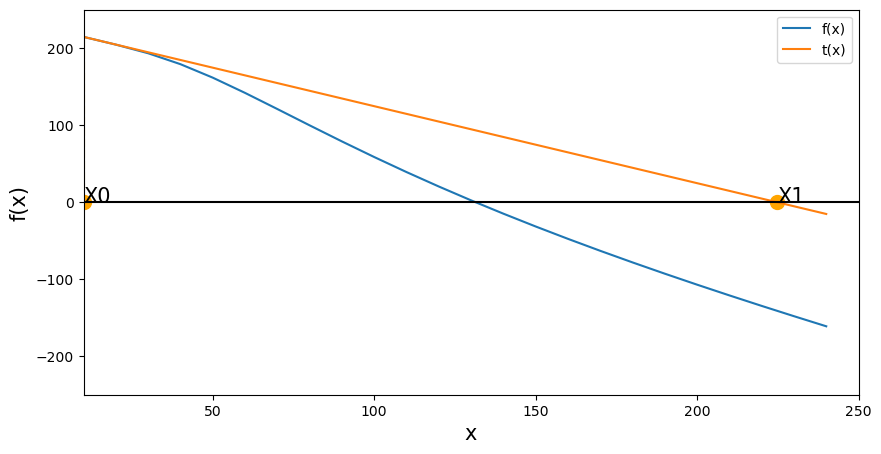

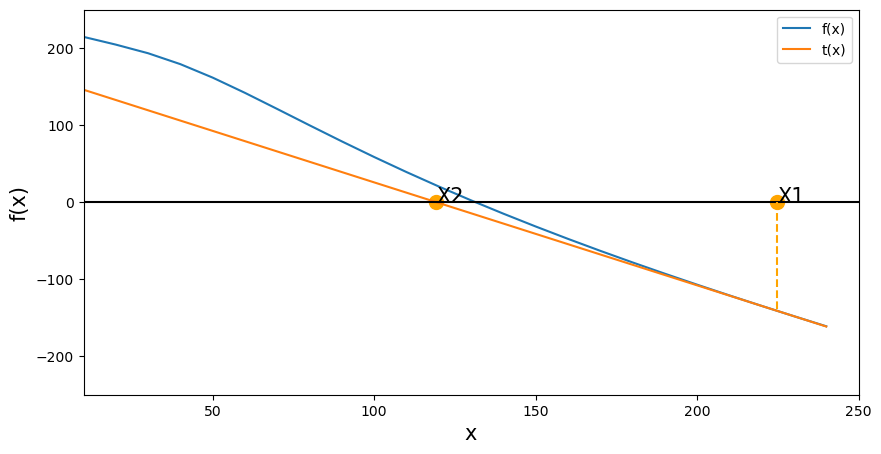

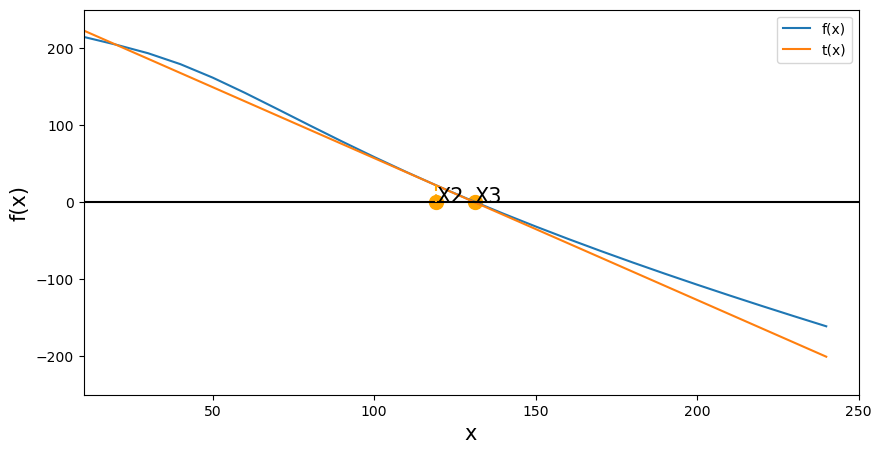

In [6]:
import matplotlib.pyplot as plt
ejex = np.arange(10, 250, 10);
y = f(ejex)
    
for p in range (3):
    def t(x):#definimos la recta tangente
        return fd(xcero[p])*(x - xcero[p]) + f(xcero[p])
    fig = plt.figure(figsize=(10,5))
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=15)
    plt.xlim(10,250)
    plt.ylim(-250,250)
    plt.ylabel('f(x)',fontsize=15)
    plt.plot(ejex, t(ejex))
    plt.axhline(y=0, color='k')   
    plt.scatter(x=xcero[p], y=0, marker="o", c='orange', s=100)
    plt.annotate("X"+str(p), (xcero[p], 0),fontsize=15)
    plt.plot([xcero[p],xcero[p]], [0,t(xcero[p])], color='orange',linestyle='dashed')
    plt.scatter(x=xuno[p], y=0, marker="o", c='orange', s=100)
    plt.annotate("X"+str(p+1), (xuno[p], 0),fontsize=15)
    plt.legend(['f(x)','t(x)'],fontsize=10)
    plt.axvline(x=0, color='m',linestyle='dashed') 
    plt.axvline(x=0.42, color='m',linestyle='dashed')
    plt.axvline(x=0.5, color='r',linestyle='dashed') 
    plt.axvline(x=1, color='r',linestyle='dashed'); 

In [8]:
print('Resumen de resultados para el \033[1mMétodo de Newton-Raphson\033[0m:')
print('A continuación se muestran todas las iteraciones:')
ejemplo.columns= ['Xi','Xi+1']
ejemplo.head(5)

Resumen de resultados para el Método de Newton-Raphson:
A continuación se muestran todas las iteraciones:


,Xi,Xi+1
0,10.000000,224.747966
1,224.747966,119.282882
2,119.282882,131.100951
3,131.100951,131.395665
4,131.395665,131.395838


La notable mejora en la convergencia muestra la efectividad del <b>Método de Newton-Raphson</b>. Es una muy buena mejora del <b>Método de las Aproximaciones Sucesivas</b>.

### <center> Método de la Secante
___
El <b>Método de Newton-Raphson</b> es muy bueno, pero puede ocurrir que no sea tan sencillo conocer la derivada, entonces la aproximemos numéricamente:

$$f'(b) = \frac{f(b)-f(a)}{b-a}$$

De esta forma, en vez de aproximar con la recta tangente, trazamos la cuerda:

$$ c(x_1) = 0 = \frac{f(b)-f(a)}{b-a}(x_1 - b) + f(b) $$

Si reemplazamos en la fórmula de NR obtenemos :

$$ x_1 = b - f(b) \frac{(b-a)}{f(b)-f(a)} $$

Si $f(x_1) \ne 0$, podemos repetir el procedimiento otra vez para obtener un $x_2$. En definitiva, podemos crear una aproximación iterativa de la siguiente forma:

$$ x_{j+1}=x_j-f(x_j)\frac{x_j-x_{j-1}}{f(x_j)-f(x_{j-1})}.$$

Como hay cierta similitud con el <b>Método de la «Regula-Falsi»</b>, suele confundirselos.


In [6]:
#import numpy as np #librería para operaciones algebraicas y numéricas
#import pandas as pd #librería para manejo de datos

#programo el método Secante
def secante(a , b, tol, itmax = 100): 
        np.seterr('raise')
        df2 = pd.DataFrame(columns=('xcero','xuno','xdos'))
        x0 = a
        x1 = b
        contador = 0  
        x2 = x1-f(x1)*(x1-x0)/(f(x1)-f(x0))
        while (contador < itmax) and (abs((x1-x0)/x1) > tol):
            df2.loc[contador] = [x0,x1,x2]
            x0 = x1                                                 
            x1 = x2
            x2 = x1-(f(x1)*(x1-x0))/(f(x1)-f(x0))
            contador += 1  
        er=abs((x1-x0)/x1)
        print('El \033[1mMétodo de la Secante \033[0mconvergió en',contador,'iteraciones, el resultado es:',np.round(x2,6),'m y el error relativo es',np.format_float_scientific(er,6),'. El valor de la función resulta',np.format_float_scientific(f(x1),precision=6),'m.')
        return df2

In [7]:
#defino el valor inicial y la tolerancia

tolerancia=10**(-8)

ejemplo2=secante(10,150,tolerancia)


El Método de la Secante convergió en 5 iteraciones, el resultado es: 131.395838 m y el error relativo es 1.386111e-11 . El valor de la función resulta 2.842171e-14 m.


In [8]:
from IPython.display import display, Math
import sympy.printing as printing

xcero2 = ejemplo2.xcero
xuno2 = ejemplo2.xuno
xdos2 = ejemplo2.xdos

print ("Analicemos todas las iteraciones. \n")  

for p in range (5):
    print ("\033[1mIteración \033[0m"+str(p+1)+": ")
    ec = "Trazo\;la\;secante\;con\; x_"+str(p)+"= "+str(xcero2[p])+"\;y\; x_"+str(p+1)+"= "+str(xuno2[p])+"\;obtengo\;la\;raíz\; x_"+str(p+2)+"= x_"+str(p+1)+"- f(x_"+str(p)+")\\frac{(x_"+str(p+1)+"-x_"+str(p)+")}{f(x_"+str(p+1)+")-f(x_"+str(p)+")}= "+str(xdos2[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

Analicemos todas las iteraciones. 

Iteración 1: 


<IPython.core.display.Math object>

Iteración 2: 


<IPython.core.display.Math object>

Iteración 3: 


<IPython.core.display.Math object>

Iteración 4: 


<IPython.core.display.Math object>

Iteración 5: 


<IPython.core.display.Math object>

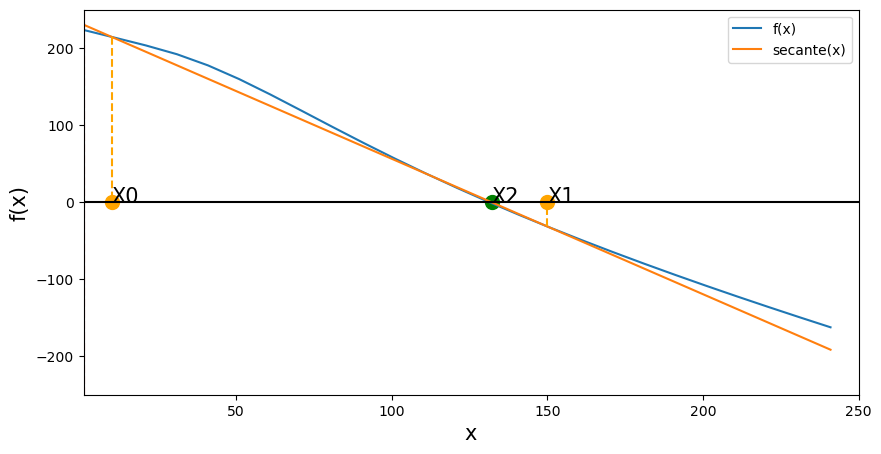

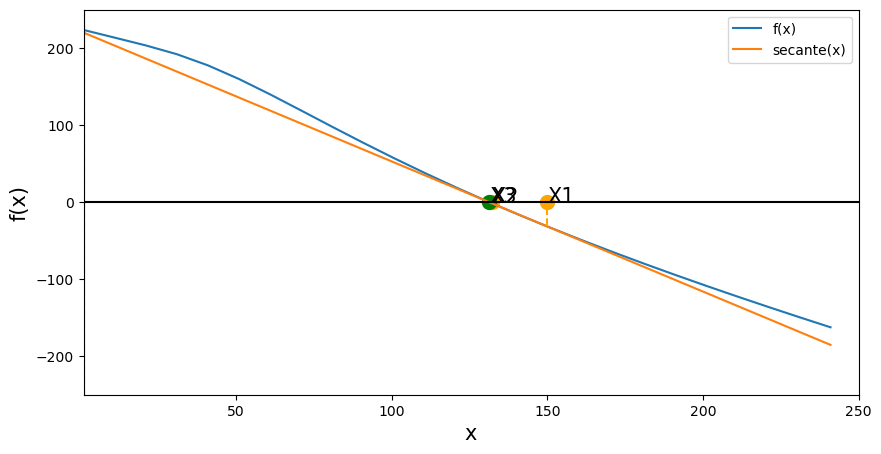

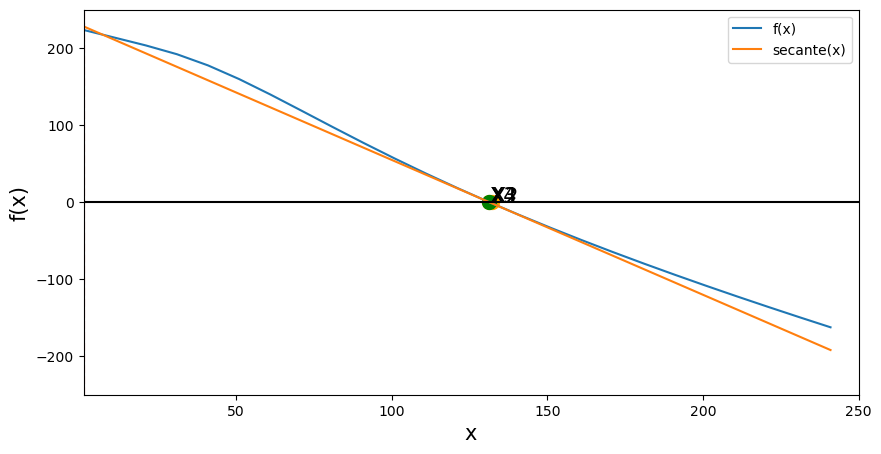

In [9]:
from matplotlib import pyplot as plt

ejex = np.arange(1, 250, 10)
y = f(ejex)
    
for p in range (3):
    def secante(x):#definimos la recta tangente
        return (f(xuno2[p])-f(xcero2[p]))*(x-xuno2[p])/(xuno2[p]-xcero2[p])+f(xuno2[p])
    
    #def c(x):#definimos la secante
     #   return ((xuno2[p]-xcero2[p])/(f(xuno2[p])-f(xcero2[p]))*(x - xcero2[p]) + f(xcero2[p])
    plt.figure(figsize=(10,5))
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=15)
    plt.xlim(1,250)
    plt.ylim(-250,250)
    plt.ylabel('f(x)',fontsize=15)
    plt.plot(ejex, secante(ejex))
    plt.scatter(x=xcero2[p], y=0, marker="o", c='orange', s=100)
    plt.annotate("X"+str(p), (xcero2[p], 0),fontsize=15)
    plt.plot([xcero2[p],xcero2[p]], [f(xcero2[p]),0], color='orange',linestyle='dashed')
    plt.scatter(x=xuno2[p], y=0, marker="o", c='orange', s=100)
    plt.annotate("X"+str(p+1), (xuno2[p], 0),fontsize=15)
    plt.plot([xuno2[p],xuno2[p]], [f(xuno2[p]),0], color='orange',linestyle='dashed')
    plt.scatter(x=xdos2[p], y=0, marker="o", c='green', s=100)
    plt.annotate("X"+str(p+2), (xdos2[p], 0),fontsize=15)
    plt.legend(['f(x)','secante(x)'],fontsize=10)
    plt.axvline(x=0., color='m',linestyle='dashed') 
    plt.axvline(x=0.42, color='m',linestyle='dashed')
    plt.axvline(x=0.5, color='r',linestyle='dashed') 
    plt.axvline(x=1, color='r',linestyle='dashed')
    plt.axhline(y=0, color='k') 

In [10]:
print('Resumen de resultados para el \033[1mMétodo de la Secante\033[0m:')
print('A continuación se muestran las iteraciones:')
ejemplo2.columns= ['X(i-1)','X(i)','X(i+1)']
ejemplo2.head(6)

Resumen de resultados para el Método de la Secante:
A continuación se muestran las iteraciones:


,X(i-1),X(i),X(i+1)
0,10.000000,150.000000,132.099918
1,150.000000,132.099918,131.370283
2,132.099918,131.370283,131.395874
3,131.370283,131.395874,131.395838
4,131.395874,131.395838,131.395838


Si bien la convergencia es algo más lenta que en el <b>Método de Newton-Raphson</b>, es mucho más eficiente que el <b>Método del Punto Fijo</b>.

![Curso Schwarz-Sosa-Castaño](https://cms.fi.uba.ar/uploads/logo_FIUBA_color_2_eb5b4d0124.png)



# <center> GRACIAS POR SU ATENCIÓN

## <center> ¿PREGUNTAS?

### <center> Ecuaciones no Lineales - Segunda Parte

***

***Curso Schwarz - Sosa - Castaño**
- 75.12/95.04 <b>Análisis Numérico I</b>. *Curso 4*.
- CB051 <b>Modelación Numérica</b>. *Curso 4*.